In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipympl

In [5]:
%matplotlib widget

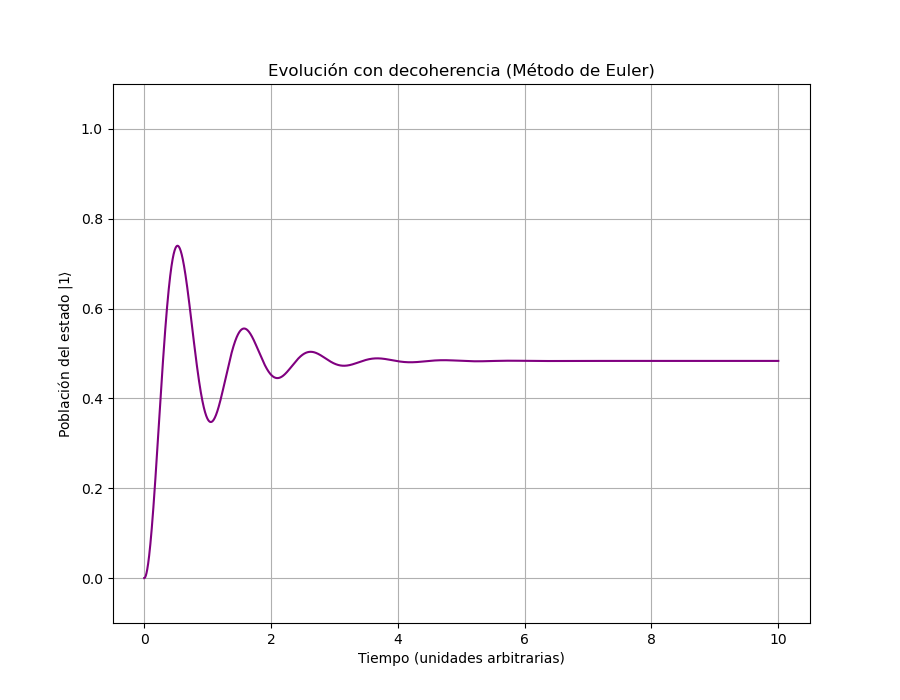

In [6]:
# Definimos los operadores de Pauli
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_plus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_minus = np.array([[0, 1], [0, 0]], dtype=complex)

# Definimos los parámetros del sistema
hbar = 1.0545718e-34 / (2 * np.pi)
Delta_q = 0.1
Omega = 6
gamma = 0.7

# Definimos el hamiltoniano
H = (hbar * Delta_q / 2) * sigma_z + (hbar * Omega / 2) * (sigma_plus + sigma_minus)

# Operadores de Lindblad
L1 = sigma_z
L2 = sigma_minus

# Definimos rho en el estado fundamental
rho_initial = np.array([[1, 0], [0, 0]], dtype=complex)

t_points = 10000
t_max = 10
t = np.linspace(0, t_max, t_points)
dt = t[1] - t[0]

# Evolución de la ecuación de Lindblad usando el método de Euler
rho_t = np.zeros((t_points, 2, 2), dtype=complex)
rho_t[0] = rho_initial

for i in range(1, t_points):
    # Derivada temporal de rho
    drho_dt = -1j / hbar * (np.dot(H, rho_t[i - 1]) - np.dot(rho_t[i - 1], H))
    
    # Términos de Lindblad
    lindblad_term_1 = np.dot(L1, np.dot(rho_t[i - 1], np.conj(L1.T))) - 0.5 * (np.dot(np.dot(L1.T, L1), rho_t[i - 1]) + np.dot(rho_t[i - 1], np.dot(L1.T, L1)))
    lindblad_term_2 = np.dot(L2, np.dot(rho_t[i - 1], np.conj(L2.T))) - 0.5 * (np.dot(np.dot(L2.T, L2), rho_t[i - 1]) + np.dot(rho_t[i - 1], np.dot(L2.T, L2)))
    
    # Método de Euler
    rho_t[i] = rho_t[i - 1] + dt * (-1j / hbar * (np.dot(H, rho_t[i - 1]) - np.dot(rho_t[i - 1], H)) + gamma * (lindblad_term_1 + lindblad_term_2))

# Calculamos la probabilidad de ocupación del estado excitado en función del tiempo
excited_state_population = np.abs(rho_t[:, 1, 1])

# Gráfica
plt.figure(figsize=(9, 7))
plt.plot(t, excited_state_population, color='purple')
plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel(r'Población del estado $|1\rangle$')
plt.title('Evolución con decoherencia (Método de Euler)')
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.show()
